# Máquina de Atwood
© 2020
Víctor A. Bettachini  
Mecánica General  
Departamento de Ingeniería e Investigación Tecnológica  
Universidad Nacional de La Matanza  

---  

## Enunciado
1. Obtenga con la ecuación de Euler-Lagrange la ecuación de la dinámica. 
Simplifique el problema considerando que la poleas de radio \\(R\\) tiene masa nula (\\(M=0\\)).
2. Compare las aceleraciones con las obtenidas usando ecuaciones de Newton.

![](../graphs/marion_fig2_1a.png)


## Análisis preliminar
- Dos coordenadas generalizadas: $x,y$
- Potencial externo: debido a la aceleración gravitatoria
- Vínculo: cuerda de longitud $l$ impone $x+ y + \pi R = l$ siendo $R$ el radio de la polea que se la considera sin masa.

## Resolución simbólica en el formalismo Lagrangiano
Python, como cualquier otro lenguaje de programación, no sólo es capaz hacer cuentas como una calculadora, lo que se llama cálculo numérico, sino que a través de la biblioteca **sympy** es capaz de resolver álgebra en forma simbólica.

A continuación se obtiene la ecuación de Euler-Lagrange con esta herramienta.

In [2]:
# biblioteca de cálculo simbólico
import sympy as sym
import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con puntos para derivadas temporales

### Variables

In [4]:
# Defino los parámetros físicos del sistema
R, m1, m2, g, l = sym.symbols('R, m_1, m_2, g, l', positive=True)

# Defino coordenadas generalizadas 
t = sym.symbols('t') # tiempo
x = sym.Function('x')(t) # posición pesa 1: x = x(t)
y = (l- sym.pi* R)- x  # posición pesa 2: definida por el vínculo
y

#### Una "nota" sobre la "notación" (¡cuac!).

Los cuadernos (notebook) **Jupyter** permiten utilizar la escritura de expresiones matemáticas en notación $\LaTeX$.
Por ejemplo el símbolo que designa la velocidad angular, la omega del alfabeto griego se puede lograr escribiendo "\omega".
Las letras así escritas pueden convertirse en caractéres en formato **unicode** al terminar de escribir la expresión y presionando la tecla "tabulador" (no dejar espacios).

In [3]:
# Notación punto
r = sym.Function('r')(t)
ω = sym.Function('ω')(t) # tipeando <tab> al final de la expresión LaTeX lo convierte a unicode 
omega = sym.Function('\omega')(t)
r, ω, omega, r.diff(t), ω.diff(t), omega.diff(t)

### Energía cinética

In [4]:
# Energía cinética
unMedio = sym.Rational(1,2) # Rational: fracción de enteros
T =  unMedio* (m1* x.diff(t)**2 + m2* y.diff(t)**2) # diff: derivada
T.simplify() # simplify: simplifica usando factor común y otras operaciones

### Energía potencial

In [6]:
# Energía potencial
V = m1* g* (-x) + m2* g* (-y)
V.simplify()

### Lagrangiano
$$
L(x,\dot{x}) = T(\dot{x})- V(x)
$$

In [7]:
L = T- V
L.simplify()

### Ecuaciones de Euler-Lagrange

Primero calculamos el que llamo lado izquierdo
$$\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{x}} L$$

In [5]:
ladoIzquierdo = L.diff(x.diff(t)).diff(t) # primero deriva respecto a x punto y luego a t
ladoIzquierdo

NameError: name 'L' is not defined

Luego el derecho
$$
\frac{\partial}{\partial x} L
$$

In [9]:
ladoDerecho = L.diff(x)
ladoDerecho

Con ambos se escribe la ecuación homegénea (no hay fuerzas no conservativas)
$$
\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{x}} L
- \frac{\partial}{\partial x} L
= 0
$$

In [10]:
eulerLagrange = sym.Eq(ladoIzquierdo-ladoDerecho, 0) # ecuación igualando a cero
eulerLagrange.simplify()

Esta es una ecuación diferencial lineal de segundo orden homogena.  

## Resolución numérica
Buscamos resolver numéricamente esta ecuación diferencial de segundo orden.
Podemos despejar $\ddot{x}$

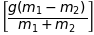

In [11]:
sym.solve(eulerLagrange,x.diff(t,2)) # entrega una lista con los posibles despejes en función de x punto punto (derivada de 2.o orden con t)

y asignar este resultado a una variable para uso posterior

In [12]:
aceleracion_x = sym.solve(eulerLagrange,x.diff(t,2))[0] # [0] toma el único elemento de la lista

Los métodos numéricos de integración más eficientes trabajan sobre una ecuación diferencial de primer orden.
Para utilizarlos reduciremos nuestro problema a un sistema de ecuaciones de primer orden.

Creamos variables nuevas para derivadas de $x$ que ubicaremos en un vector de estados que calcularemos en pequeños pasos de $t$ desde el inicial $t_0$
$$[x_1, x_2]=[\dot{x}, \ddot{x}]$$
de forma que ahora debemos resolver
$$
\left\{
\begin{array}{l}
x_0 = x\\
\dot{x}_0 = \dot{x} = x_1\\
\dot{x}_1 = \ddot{x}_0 = \ddot{x} = g \frac{(m1 - m_2)}{m_1 + m_2}\\
\end{array}
\right.
\implies
\left\{
\begin{array}{l}
\dot{x}_0 = x_1\\
\dot{x}_1 = g \frac{(m1 - m_2)}{m_1 + m_2}\\
\end{array}
\right.
$$

Referencia: https://pundit.pratt.duke.edu/wiki/Python:Ordinary_Differential_Equations/Examples

Referencia: http://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html

Referencia: https://ipython-books.github.io/123-simulating-an-ordinary-differential-equation-with-scipy/

In [13]:
# defino rango de tiempos, valores iniciales y constantes
g_valor = 9.81 # [m s-2]
m1_valor = 2 # [kg]
m2_valor = 1 # [kg]
aceleracion_x_valores = aceleracion_x.subs([(g,g_valor),(m1,m1_valor), (m2,m2_valor)]) # lista de un elemento, substituyo con valores
aceleracion_x_valores # [m s-2]

Lo anterior es una expresión _sympy_, necesito pasarla a una expresión que pueda interpretarse fuera de este módulo.
Se usa la función _lambdify_ que retorna una función para el módulo indicado, por defecto _numpy_, en función de la variable indicada. Si no hay variable, no importa que valor usemos de esta.

In [14]:
aceleracion_x_numerico = sym.lambdify(t,aceleracion_x_valores)
aceleracion_x_numerico = aceleracion_x_numerico(2) # no importa que valor de t se le pase a la función
aceleracion_x_numerico

In [15]:
# defino una función con el sistema de derivadas
# t : no se usa en este sistema pero lo dejamos para uso posterior
# x : lista de estado con [x_0, x_1]
# constantes : lista de constates, en este caso tendrá g(m1-m2)/(m1+m2)
# dx_dt : lista de derivadas
def sistemaDerivadas(x,t, constante):
    velocidad = x[1]
    aceleracion = constante 
    dx_dt = [velocidad, aceleracion]
    return dx_dt

Ahora defino condiciones iniciales del sistema y el rango de tiempo a analizar 

In [16]:
# biblioteca de cálculo numérico general
import numpy as np

In [17]:
t_rango = np.linspace(0,10, num= 100) # 100 tiempos entre 0 y 10 s

E integramos en los pasos de tiempo de `t_rango`.

Referencia: https://docs.scipy.org/doc/scipy-1.1.0/reference/tutorial/integrate.html

In [18]:
# biblioteca de cálculo científico: eficientes herramientas de cálculo numérico
from scipy.integrate import odeint

In [19]:
# E integrar de a pasos en el tiempo
x_inicial = [0, 0] # [posicion, velocidad] iniciales
solucion = odeint(sistemaDerivadas, x_inicial, t_rango, args=(aceleracion_x_numerico,) )

## Graficación

In [20]:
# biblioteca de graficación
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

[Text(0, 0.5, '$\\dot{x}$ [m/s]'),
 Text(0.5, 0, 't [s]'),
 Text(0.5, 1.0, 'Velocidad')]

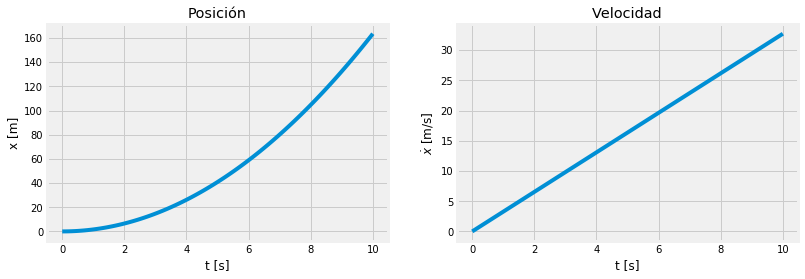

In [21]:
fig, ax = plt.subplots(nrows= 1, ncols= 2, squeeze=False, figsize=(12, 4)) # dos figuras en la misma fila
ax[0,0].plot(t_rango, solucion[:,0]) # fila 0 columna 0
ax[0,0].set(xlabel='t [s]', ylabel='x [m]', title='Posición')
ax[0,1].plot(t_rango, solucion[:,1]) # fila 0 columna 1
ax[0,1].set(xlabel='t [s]', ylabel='$\dot{x}$ [m/s]', title='Velocidad')

### Error del método numérico
Comparemos con la solución analítica

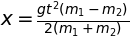

In [22]:
sym.Eq(x,unMedio* aceleracion_x* t**2)

Defino funciones que calculan la posición y velocidad obtenidas analíticamente. 

In [25]:
def xAnalitica(aceleracion_x_numerico, t):
    '''
    Posición: Un medio de la aceleración por cuadrado del tiempo
    '''
    return 0.5* aceleracion_x_numerico* t**2

def vAnalitica(aceleracion_x_numerico, t):
    '''
    Velocidad: aceleración por tiempo
    '''
    return aceleracion_x_numerico* t

Y grafico la solución numérica, la analítica y su diferencia para evaluar el error de la primera.

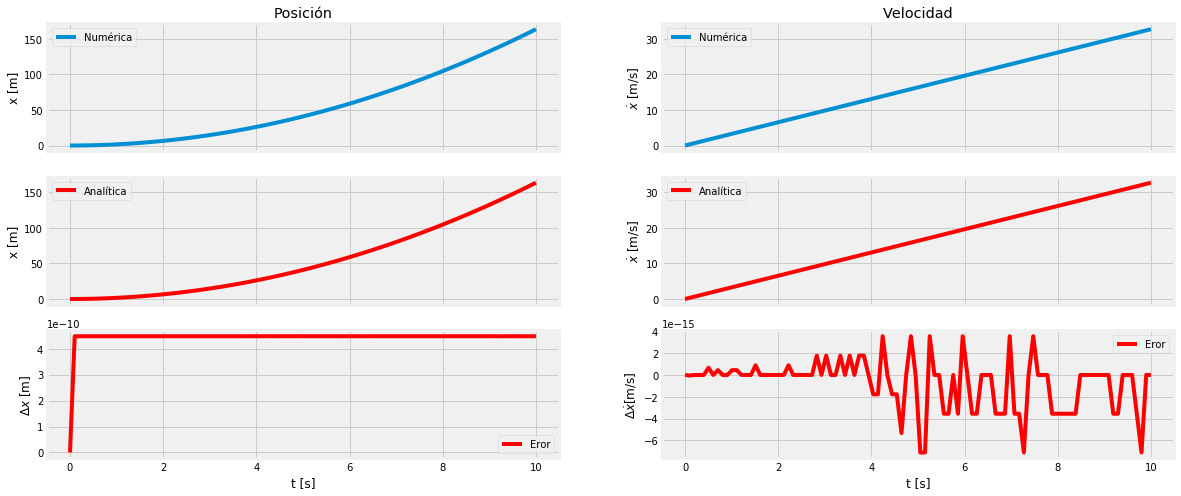

In [32]:
fig, ax = plt.subplots(nrows= 3, ncols= 2, figsize=(18, 8), sharex= True) # dos figuras en la misma fila

ax[0,0].set(ylabel='x [m]', title='Posición')
ax[0,0].plot(t_rango, solucion[:,0], label='Numérica') # fila 0 columna 0
ax[0,0].legend()

ax[1,0].set(ylabel='x [m]')
ax[1,0].plot(t_rango, xAnalitica(aceleracion_x_numerico, t_rango), 'r', label='Analítica') # fila 0 columna 0
ax[1,0].legend()

ax[2,0].set(xlabel='t [s]', ylabel='$\Delta x$ [m]')
ax[2,0].plot(t_rango, solucion[:,0] - xAnalitica(aceleracion_x_numerico, t_rango), 'r', label='Eror') # fila 0 columna 0
ax[2,0].legend()

ax[0,1].set(ylabel='$\dot{x}$ [m/s]', title='Velocidad')
ax[0,1].plot(t_rango, solucion[:,1], label='Numérica') # fila 0 columna 1
ax[0,1].legend()

ax[1,1].set(ylabel='$\dot{x}$ [m/s]')
ax[1,1].plot(t_rango, vAnalitica(aceleracion_x_numerico, t_rango), 'r', label='Analítica') # fila 0 columna 0
ax[1,1].legend()

ax[2,1].set(xlabel='t [s]', ylabel='$\Delta \dot{x}$[m/s]')
ax[2,1].plot(t_rango, solucion[:,1]- vAnalitica(aceleracion_x_numerico, t_rango), 'r', label='Eror') # fila 0 columna 0
ax[2,1].legend()

El algorítmo de integración mantiene el error dentro de un tolerancia (parámetros `atol` y `htol`) en la variable principal (posición) por debajo de un valor ajustando la derivada primera (velocidad).